In [1]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, IBMQ, transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

In [2]:
qr1 = QuantumRegister(3,'pv')
qr2 = QuantumRegister(2,'pos')
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr1,qr2,cr)

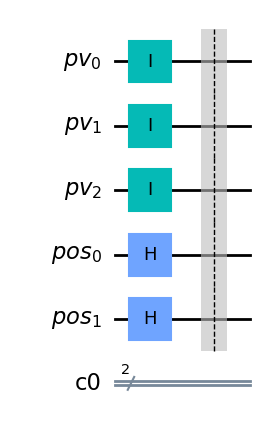

In [3]:
qc.h(3)
qc.h(4)
for k in range(0,3,1):
    qc.i(k)
qc.barrier()
qc.draw('mpl')

In [4]:
#pixel 1
qc.x(3)
qc.x(4)
qc.ccx(3,4,0)
qc.ccx(3,4,1)
qc.x(3)
qc.x(4)
qc.barrier()

In [5]:
#pixel 2
qc.x(4)
qc.ccx(3,4,0)
qc.ccx(3,4,2)
qc.x(4)
qc.barrier()

In [6]:
#pixel 3
qc.x(3)
qc.ccx(3,4,0)
qc.x(3)
qc.barrier()

In [7]:
#pixel 4
qc.ccx(3,4,0)
qc.ccx(3,4,1)
qc.ccx(3,4,2)

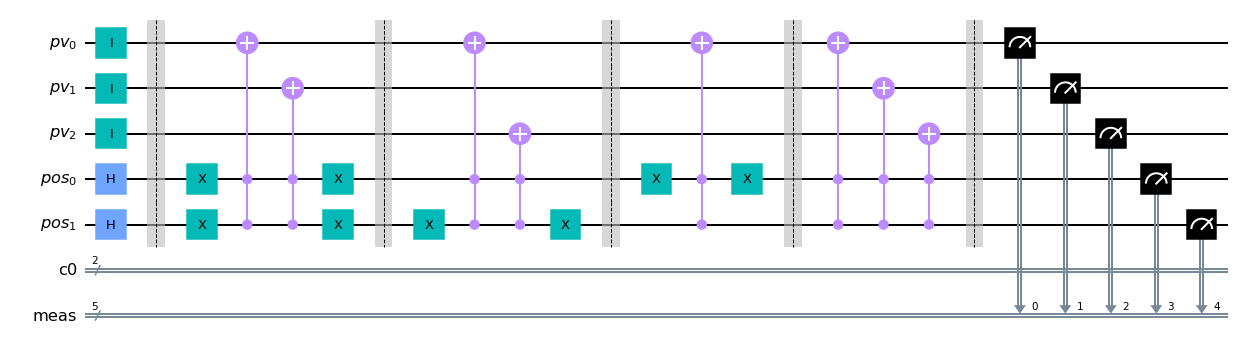

In [8]:
qc.measure_all()
qc.draw('mpl')

{'01101 00': 2223, '00011 00': 2255, '10001 00': 2223, '11111 00': 2199}


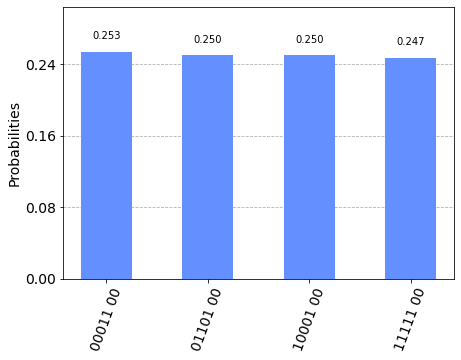

In [14]:
aer_sim = Aer.get_backend('aer_simulator')
qc_t = transpile(qc,aer_sim)
job = aer_sim.run(qc_t,shots = 8900)
result = job.result()
print(result.get_counts())
plot_histogram(result.get_counts())

In [15]:
print('Circuit Dimensions')
print('Circuit depth:',qc.decompose().depth())
print('Circuit size:',qc.decompose().size())
qc.decompose().count_ops()

Circuit Dimensions
Circuit depth: 89
Circuit size: 138


OrderedDict([('cx', 48),
             ('t', 32),
             ('tdg', 24),
             ('h', 16),
             ('u3', 8),
             ('barrier', 5),
             ('measure', 5),
             ('id', 3),
             ('u2', 2),
             ('save_statevector', 1)])